### Codio Activity 2.8: Histograms and Conditional Probability Distributions

**Expected Time: 45 Minutes**

**Total Points: 20**

This assignment uses `pandas` and `seaborn` to plot distributions of data conditioned on categorical features.  

#### Index:

- [Question 1](#Problem-1:-Conditional-Probabilities-with-`pandas`)
- [Question 2](#Problem-2:-$P(age->-40-|-class-=-~--'Second')$)
- [Question 3](#Problem-3:-Visualizing-the-Conditional-Probability)
- [Question 4](#Problem-4:-$P(\text{over 30}-|-\text{survived})$)
- [Question 5](#Problem-5:-Distribution-of-Ages-for-Survived-and-Not-Survived)
- [Question 6](#Problem-6:-Which-is-more-likely?)


In [12]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np

### The Dataset

For this assignment the dataset from `seaborn` relating to the titanic will be used.  This dataset contains specific information for each passenger on the titanic cruise ship.  Below the data is loaded, the first five rows displayed, and information on features displayed.  



In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


[Back to top](#Index:) 

### Problem 1: Conditional Probabilities with `pandas`

**3 Points**

Using the titanic data, conditional probabilities can be calculated by subsetting the data to the condition of interest and comparing the outcomes within this criteria.  For example, what is the probability given that someone is in first class that they are over the age of 40? 

To compute this, assign the following objects to the specified variable:

```python
first_class = #how many people in first class
first_class_over_40 = #how many people in first class were over the age of 40?
p_over_40_given_first_class = #p(age > 40 | class = First)
```

In [5]:
### GRADED

first_class = np.sum(titanic.pclass == 1)
first_class_over_40 = np.sum((titanic.pclass == 1) & (titanic.age > 40))
p_over_40_given_first_class = first_class_over_40/first_class

# Answer check
print(p_over_40_given_first_class)

0.35185185185185186


[Back to top](#Index:) 

### Problem 2: $P(age > 40 | class = ~  'Second')$

**3 Points**

Now compute the probability that a passenger is over the age of 40 given that the passenger was in second class.  Again there are three values to compute:

- Number of passengers in second class (second_class)
- Number of passengers in second class over the age of 40
- Probability a passenger is over the age of 40 given they are in second class


In [6]:
### GRADED

second_class = np.sum(titanic.pclass == 2)
second_class_over_40 = np.sum((titanic.pclass == 2) & (titanic.age > 40))
p_over_40_given_second_class = second_class_over_40/second_class

# Answer check
print(p_over_40_given_second_class)

0.18478260869565216


[Back to top](#Index:) 

### Problem 3: Visualizing the Conditional Probability

**4 Points**


To visualize the earlier conditional probabilities, draw a plot containing a histogram of the age distribution of passengers in first and second class. Follow the hints below for one approach and use `sns.histplot()` function for drawing the histograms.

<Axes: xlabel='age', ylabel='Count'>

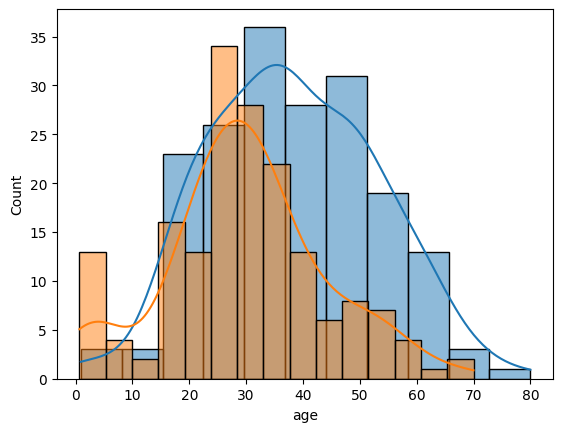

In [7]:
### GRADED

first_class = titanic[titanic.pclass == 1].age
second_class = titanic[titanic.pclass == 2].age

#histogram of first class
sns.histplot(data=first_class, kde=True)

#histogram of second class
sns.histplot(data=second_class, kde=True)

[Back to top](#Index:) 

### Problem 4: $P(\text{over 30} | \text{survived})$

**4 Points**


Compute the probability given that a passenger survived, they were over the age of 30.  Again, determine the following:

- Number of passengers in survived
- Number of passengers in who survived over the age of 30
- $P(\text{over 30} | \text{survived})$


In [8]:
### GRADED

num_survived = np.sum(titanic.survived == 1)
survived_over_30 = np.sum((titanic.survived == 1) & (titanic.age > 30))
p_over_30_given_survived = survived_over_30/num_survived
display([num_survived, survived_over_30, p_over_30_given_survived])

# Answer check
print(p_over_30_given_survived)

[342, 124, 0.36257309941520466]

0.36257309941520466


[Back to top](#Index:) 

### Problem 5: Distribution of Ages for Survived and Not Survived

**3 Points**

To plot the distribution of ages for those that survived and those that did not together on the same axes, use the `hue` argument in `sns.histplot` set to `survived` to create histograms of the ages conditioned on survived or not.

<Axes: xlabel='age', ylabel='Count'>

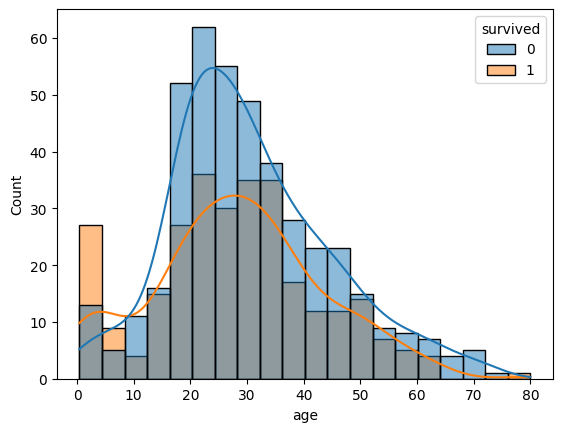

In [9]:
### GRADED

# YOUR CODE HERE
sns.histplot(data=titanic, x="age", hue="survived", kde=True)

[Back to top](#Index:) 

### Problem 6: Which is more likely?

**3 Points**

Based on your histogram in problem 5, given that a person was under the age of 20, is it more likely that they survived or did not survive?  Assign your answer as a boolean value to the variable `survived` below. True means you believe more likely to have survived, False more likely to be deceased.

In [11]:
### GRADED

under_20_survived = np.sum((titanic.age < 20) & (titanic.survived == 1))
under_20_not_survived = np.sum((titanic.age < 20) & (titanic.survived == 0))
survived = under_20_survived > under_20_not_survived
display([under_20_survived, under_20_not_survived, survived])

[79, 85, False]